In [ ]:
!pip install vbeam

# A visualization of the cartesian bounds of a sector scan
You need to install these dependencies to run this notebook:
```bash
pip install matplotlib numpy ipywidgets
```

Run the following cell _(you can ignore most of the code, it is mostly just for drawing shapes with `matplotlib`)_ and try dragging the various sliders. It will create a `SectorScan` with the given azimuths and depths, and then draw the cartesian bounds of the scan.

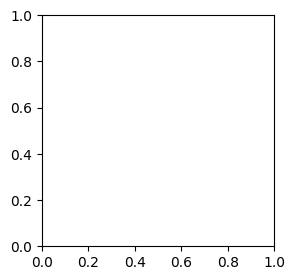

interactive(children=(Checkbox(value=False, description='autoscale_plot'), FloatSlider(value=-0.7, description…

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

from vbeam.scan import SectorScan, sector_scan


def draw_arc(
    ax: plt.Axes, center: np.ndarray, min_az: float, max_az: float, radius: float
):
    diam = radius * 2
    theta1, theta2 = np.degrees(min_az), np.degrees(max_az)
    arc = patches.Arc(center, diam, diam, theta1=theta1, theta2=theta2, color="#FF195E")
    ax.add_patch(arc)


def draw_line_between(ax: plt.Axes, p1: np.ndarray, p2: np.ndarray):
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color="#FF195E", linewidth=1)


def draw_sector_scan(ax: plt.Axes, scan: SectorScan):
    center = scan.apex[[0, 2]] if scan.ndim == 1 else np.array([0, 0])
    min_az, max_az, min_depth, max_depth = scan.bounds

    # Draw the inner and outer arc
    draw_arc(ax, center, min_az, max_az, min_depth)  # Draw the inner arc
    draw_arc(ax, center, min_az, max_az, max_depth)  # Draw the outer arc

    # Draw lines between the corners of the inner and outer arcs to complete the arc.
    min_vec = np.array([np.cos(min_az), np.sin(min_az)])
    max_vec = np.array([np.cos(max_az), np.sin(max_az)])
    # Plot a line from min_vec to max_vec
    draw_line_between(ax, min_vec * min_depth + center, min_vec * max_depth + center)
    draw_line_between(ax, max_vec * min_depth + center, max_vec * max_depth + center)


def draw_bounds(ax: plt.Axes, scan: SectorScan):
    bounds = scan.cartesian_bounds
    ax.add_patch(
        patches.Rectangle(
            (bounds[2], bounds[0]),
            bounds[3] - bounds[2],
            bounds[1] - bounds[0],
            fill=False,
            color="#0085FF",
        )
    )


@interact(
    min_azimuth=(-np.pi, np.pi, 0.01),
    max_azimuth=(-np.pi, np.pi, 0.01),
    min_depth=(0, 1.1, 0.01),
    max_depth=(0, 1.1, 0.01),
)
def plot(
    autoscale_plot=False, min_azimuth=-0.7, max_azimuth=0.7, min_depth=0, max_depth=1
):
    min_azimuth, max_azimuth = min_azimuth - np.pi / 2, max_azimuth - np.pi / 2
    scan = sector_scan(
        np.linspace(min_azimuth, max_azimuth, 10),
        np.linspace(min_depth, max_depth, 10),
    )

    fig, ax = plt.subplots(figsize=(3, 3))
    draw_bounds(ax, scan)
    draw_sector_scan(ax, scan)

    if autoscale_plot:
        bounds = scan.cartesian_bounds
        width = bounds[3] - bounds[2]
        height = bounds[1] - bounds[0]
        mid_x = (bounds[2] + bounds[3]) / 2
        mid_y = (bounds[0] + bounds[1]) / 2
        size = max(width, height) + 0.1
        ax.set_xlim(mid_x - size / 2, mid_x + size / 2)
        ax.set_ylim(mid_y - size / 2, mid_y + size / 2)
    else:
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
    title = "Cartesian bounds of sector scan"
    if min_azimuth > max_azimuth:
        title = "Invalid scan: min_azimuth > max_azimuth"
    if min_depth > max_depth:
        title = "Invalid scan: min_depth > max_depth"
    ax.set_title(title)
    fig.tight_layout()